In [3]:
import pandas as pd

In [9]:
import seaborn as sns

In [4]:
file = "/Users/Lenovo/notebooks/games.csv"

## all columns

In [5]:
gameData = pd.read_csv(file)
gameData.head()

,id,title,price_ig,discount,price_retail,price_steam,region,DLC,platform,link,availability,genre,languages,release_date,user_rating,number_comments,review,rating_review
0,1,FIFA 21,39.69,-34%,60.0,59.99,Worldwide,0,Origin,https://www.instant-gaming.com/en/6890-buy-gam...,In stock,Multiplayer Simulation Sports Soccer Runner Pv...,cn de en es fr it jp kr pl pt ru,9 October 2020,48.0,50.0,This game is boring i have bought it from EA ...,30.0
1,2,Watch Dogs Legion,47.49,-21%,60.0,NaN,Worldwide,0,Uplay,https://www.instant-gaming.com/en/2540-buy-gam...,In stock,GeForce Now Action Adventure Cooperation Multi...,cn de en es fr it jp kr pl ru,29 October 2020,61.0,20.0,Après un second volet moins mature que son aîn...,70.0
2,3,FIFA 21: 2200 FUT Points,15.89,-21%,20.0,NaN,Worldwide,1,Origin,https://www.instant-gaming.com/en/7275-buy-gam...,In stock,Multiplayer Simulation Sports Soccer Football ...,Multi,9 October 2020,65.0,1.0,Mal wieder viel zu teuer für jedes jahr das gl...,30.0
3,4,Dead by Daylight,5.48,-73%,20.0,19.99,Worldwide,0,Steam,https://www.instant-gaming.com/en/1904-buy-gam...,In stock,GeForce Now Action Cooperation Multiplayer Str...,cn de en es fr it jp kr pl pt ru,14 June 2016,83.0,382.0,All around great game. With friends it is gre...,90.0
4,5,Minecraft,19.49,-19%,24.0,NaN,Worldwide,0,Other platform,https://www.instant-gaming.com/en/442-buy-game...,In stock,Management Mac Multiplayer RPG VR,Multi,19 November 2011,90.0,541.0,Best game ever god sandboxgame adn a lot of ga...,100.0


In [6]:
gameCorr = gameData.corr()
gameCorr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,id,price_ig,price_retail,DLC,user_rating,number_comments,rating_review
id,1.00,-0.03,-0.12,-0.12,-0.08,-0.15,-0.08
price_ig,-0.03,1.00,0.72,-0.07,-0.07,0.01,-0.03
price_retail,-0.12,0.72,1.00,-0.17,-0.07,0.06,-0.04
DLC,-0.12,-0.07,-0.17,1.00,0.08,-0.02,0.05
user_rating,-0.08,-0.07,-0.07,0.08,1.00,0.07,0.71
number_comments,-0.15,0.01,0.06,-0.02,0.07,1.00,0.05
rating_review,-0.08,-0.03,-0.04,0.05,0.71,0.05,1.00


### correlation between user_rating and rating_review

<AxesSubplot:xlabel='user_rating', ylabel='rating_review'>

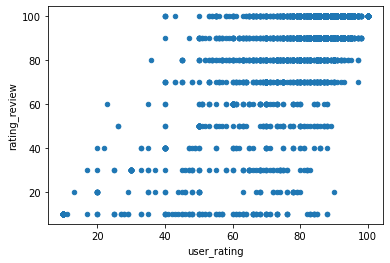

In [7]:
gameData.plot.scatter(x='user_rating', y='rating_review')

thye correlation between user_rating and rating_reveiw is about what I expected, the rating of a review seems to have a strong correlation, but the the rating of the review can different from the user rating. a positive review rating doesn't mean that the user has the same opinion

### correlation between user_rating and number_comments

<AxesSubplot:xlabel='user_rating', ylabel='number_comments'>

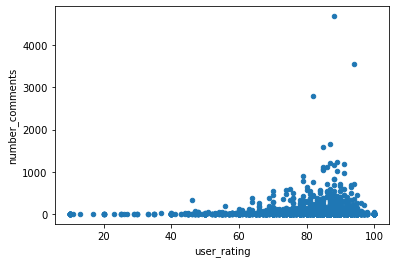

In [8]:
gameData.plot.scatter(x='user_rating', y = 'number_comments')

the correlation between the amount of commennts and the user rating is a weak positive, a game with few comments can still get a high rating. most games have a low amount of comments, regardless of the review. the few games that do have a hight amount of comments usually have s high rating.
I was actually expecting there to be no correlation at all, instead of a small one.

## categorical x numerical region grouping

In [10]:
gameData.groupby('region').mean()

,id,price_ig,price_retail,DLC,user_rating,number_comments,rating_review
region,,,,,,,
ES,4486.168675,24.385522,30.320988,0.566265,50.222222,30.941176,40.000000
EUR,66.250000,23.917500,25.000000,0.000000,NaN,186.250000,NaN
Europe,2878.959788,19.302953,37.743820,0.194709,80.771341,71.251812,84.207317
Worldwide,3508.760377,9.965223,23.962011,0.186792,79.433254,37.079429,81.527731
europe,4564.000000,11.990000,20.000000,0.000000,NaN,NaN,NaN


<AxesSubplot:xlabel='region', ylabel='price_retail'>

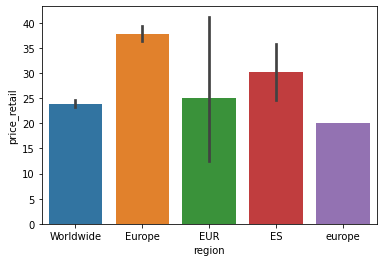

In [11]:
sns.barplot(y ='price_retail', x = 'region', data = gameData )

the EUR region has the largest confidene interval bar, but the 'europe' region has no confidence bar. The 'Europe' region has the highest retail price. because most bars are different 'versions' (notations) of europe it's difficult to directly compare to the wordwide region. Also the used currency is not known.

<AxesSubplot:xlabel='region', ylabel='user_rating'>

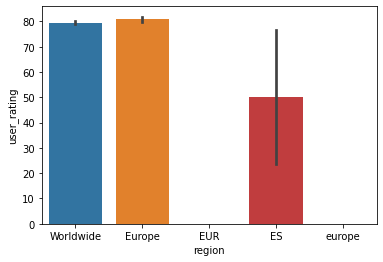

In [12]:
sns.barplot(y= 'user_rating', x = 'region', data = gameData)

<AxesSubplot:xlabel='region', ylabel='rating_review'>

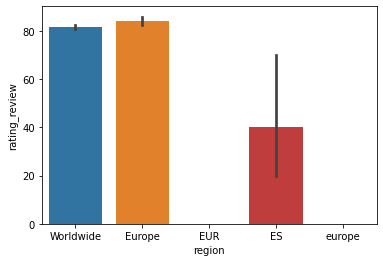

In [13]:
sns.barplot(y= 'rating_review', x = 'region', data = gameData)

## categorical x categorical

In [15]:
from scipy.stats import chi2_contingency as chi2_c

### Platform and Availability

I expect there to be no correlation between the two for the digital platforms (steam, GOG.com, epic games, etc.).

In [17]:
ContinPlatAvail = gameData.groupby(['platform', 'availability']).size().unstack('platform', fill_value = 0)
ContinPlatAvail

platform,Battle.net,Bethesda,Epic Games,GOG.com,Microsoft Store,Ncsoft,Nintendo,Origin,Other platform,Playstation,Rockstar,STEAM,Software,Steam,Uplay,Xbox,Xbox Play Anywhere
availability,,,,,,,,,,,,,,,,,
Delivery 1 December 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Delivery 10 December 2020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
Delivery 10 November 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Delivery 13 November 2020,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Delivery 17 November 2020,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Release date: 8 September 2020,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Release date: 9 April 2019,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Release date: 9 April 2021,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


most platfroms and have no availability

<AxesSubplot:xlabel='availability'>

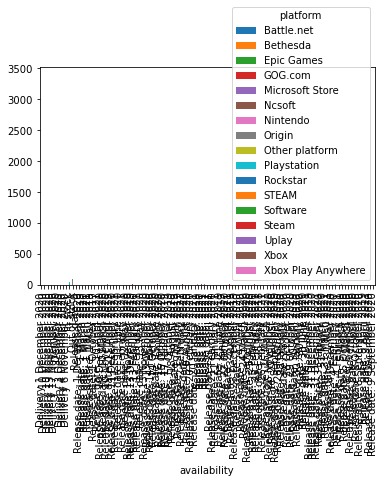

In [18]:
ContinPlatAvail.plot.bar()

there are hardly any visible bars and the visible bars are short in comparisson to the scale

In [19]:
chi2_c(ContinPlatAvail)

(2167.9065996001746,
 4.1705738267204616e-14,
 1696,
 array([[0.02173913, 0.00822562, 0.04817861, ..., 0.11692127, 0.35898942,
         0.02820212],
        [0.01086957, 0.00411281, 0.02408931, ..., 0.05846063, 0.17949471,
         0.01410106],
        [0.02173913, 0.00822562, 0.04817861, ..., 0.11692127, 0.35898942,
         0.02820212],
        ...,
        [0.00543478, 0.0020564 , 0.01204465, ..., 0.02923032, 0.08974736,
         0.00705053],
        [0.01086957, 0.00411281, 0.02408931, ..., 0.05846063, 0.17949471,
         0.01410106],
        [0.00543478, 0.0020564 , 0.01204465, ..., 0.02923032, 0.08974736,
         0.00705053]]))

there is a 417.1% correlation